In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Here is a summary of the limits we know so far
* axial (B1), max=449N

In [5]:
start = Time('2020-03-05T17:46:00') #this is UTC
end = Time('2020-03-05T17:56:00') 

client = EfdClient('summit_efd')
csc_index = 1

In [6]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

0


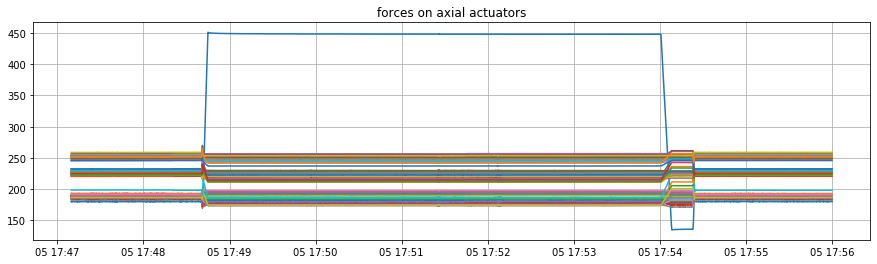

In [8]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialForceMeasured%d'%i])
    if (max(dfa['axialForceMeasured%d'%i])>300):
        print(i)
plt.title('forces on axial actuators')
plt.grid();

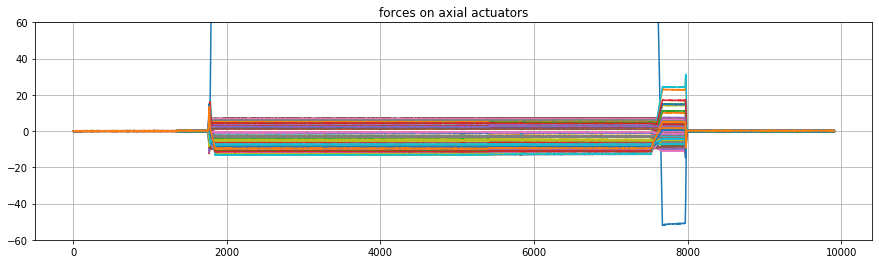

In [12]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(np.arange(len(dfa)), dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0])
plt.title('forces on axial actuators')
plt.ylim([-60, 60])
plt.grid();

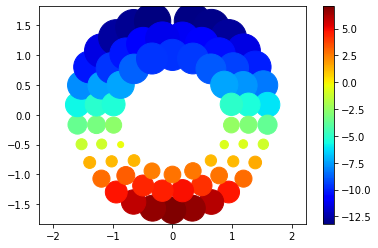

In [14]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]

f0 = np.array([dfa['axialForceMeasured%d'%i][0] for i in range(72)])
f1 = np.array([dfa['axialForceMeasured%d'%i][2000] for i in range(72)])
aa = f1 -f0
aa[0] = 0
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.jet()
plt.axis('equal')
plt.colorbar();

In [15]:
sum(aa)

-264.61572265625

In [17]:
f1[0]

449.2077941894531

In [18]:
f1[0]-f0[0]

262.24542236328125

In [19]:
sum(f1), sum(f0)

(15575.083953857422, 15577.45425415039)

In [20]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialActuatorPositionAbsoluteEncoderPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

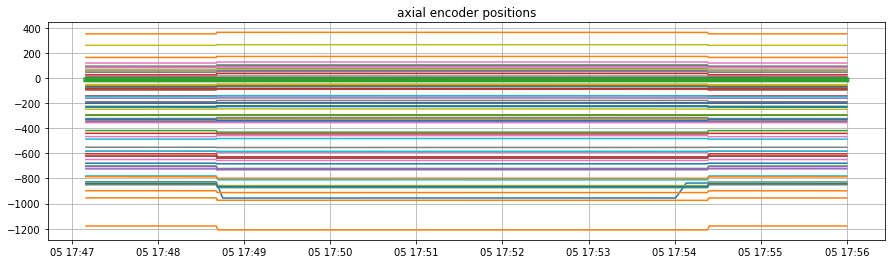

In [21]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialEncoderPositionMeasured%d'%i])
plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialEncoderPositionMeasured%d'%14],linewidth=5)
plt.title('axial encoder positions')
plt.grid();

In [22]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

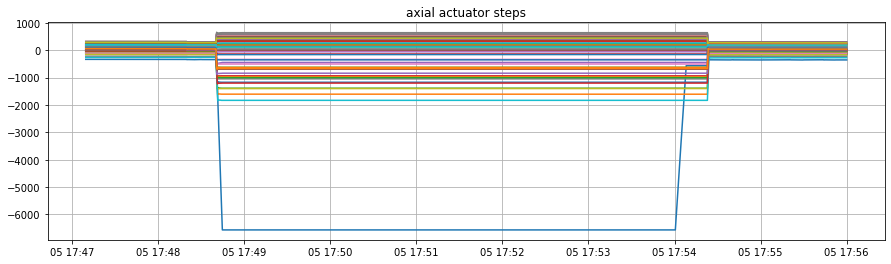

In [24]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialAbsolutePositionSteps%d'%i])
plt.title('axial actuator steps')
plt.grid();